In [ ]:
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/portfolio/household_power_consumption.csv")

# **1.1 Choosing a Dataset**
---
The dataset selected for this project is the **Individual Household Electric Power Consumption Dataset**, obtained from the **UCI Machine Learning Repository**. The dataset contains detailed measurements of electric power consumption in a single household, recorded at a **one-minute sampling rate** over nearly **four years**.

This dataset aligns with **United Nations Sustainable Development Goal (UNSDG) 7: Affordable and Clean Energy**, as it supports analysis of **energy usage patterns, efficiency, and responsible electricity consumption**.

---

# **1.2 Dataset Description**
---

### **(a) Dataset Creation**
The dataset was created by **Georges Hébrail** and **Alice Bérard**. Data collection was conducted between **December 2006 and November 2010** in a household located in **Sceaux, France**, approximately 7 km from Paris. The dataset was officially donated to the **UCI Machine Learning Repository** on **29 August 2012**.

### **(b) Dataset Access**
The dataset was accessed from the **UCI Machine Learning Repository** using the `ucimlrepo` Python package on **[02-07-2026]**. The repository provides **open access for research and academic use**. The dataset is distributed under the **Creative Commons Attribution 4.0 (CC BY 4.0) license**.

### **(c) Alignment with UNSDG**
This dataset aligns with **UNSDG Goal 7: Affordable and Clean Energy** by:

- Enabling analysis of **household energy consumption patterns**
- Supporting **energy efficiency monitoring**
- Helping identify **peak usage periods and energy waste**
- Contributing to **sustainable energy planning and management**

Insights derived from this dataset can support **smarter energy consumption, reduced electricity waste, and improved energy efficiency** at the household level.

---

# **1.3 Dataset Characteristics**
---

- **Dataset Type:** Multivariate, Time-Series  
- **Number of Instances:** 2,075,259  
- **Number of Features:** 9  
- **Feature Type:** Continuous and categorical  
- **Associated Tasks:** Regression, Clustering  
- **Missing Values:** Yes (approximately 1.25% of records)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
df.shape

(2075259, 9)

In [ ]:
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:


import pandas as pd
import numpy as np

def preprocess_power_data(df):
    """
    Clean and preprocess the Individual Household Electric Power Consumption dataset.

    Steps:
    1. Convert Date & Time to datetime index
    2. Handle missing values via linear interpolation
    3. Remove negative or impossible values
    4. Optionally clip extreme outliers
    """

    # --------------------------
    # 1. Combine Date & Time
    # --------------------------
    if 'Date' in df.columns and 'Time' in df.columns:
        df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
        df.set_index('Datetime', inplace=True)
        df.drop(['Date','Time'], axis=1, inplace=True)

    # --------------------------
    # 2. Fill missing values
    # --------------------------
    # Formula-based linear interpolation for numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].interpolate(method='time')

    # --------------------------
    # 3. Remove impossible values
    # --------------------------
    # E.g., negative power, voltage < 0, sub-metering < 0
    for col in numeric_cols:
        df.loc[df[col] < 0, col] = np.nan

    # Interpolate again if negatives were set to NaN
    df[numeric_cols] = df[numeric_cols].interpolate(method='time')

    # --------------------------
    # 4. Clip extreme outliers (optional)
    # --------------------------
    # Use 1st and 99th percentile
    for col in numeric_cols:
        lower = df[col].quantile(0.01)
        upper = df[col].quantile(0.99)
        df[col] = df[col].clip(lower, upper)

    return df


In [ ]:
# Preprocess
df_clean = preprocess_power_data(df)



Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [ ]:
# Check missing values
df_clean.isna().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


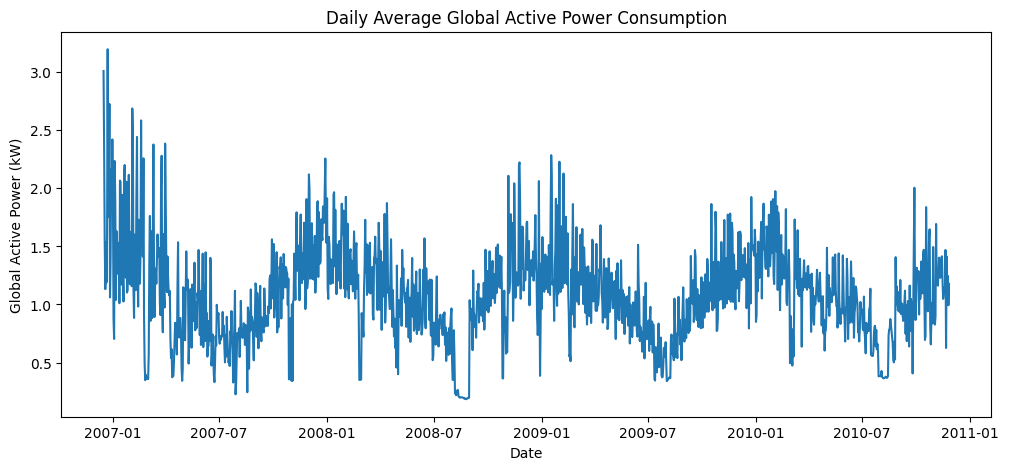

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Resample to daily mean for better visualization
df_daily = df["Global_active_power"].resample("D").mean()

plt.figure(figsize=(12, 5))
plt.plot(df_daily.index, df_daily)
plt.title("Daily Average Global Active Power Consumption")
plt.xlabel("Date")
plt.ylabel("Global Active Power (kW)")
plt.show()



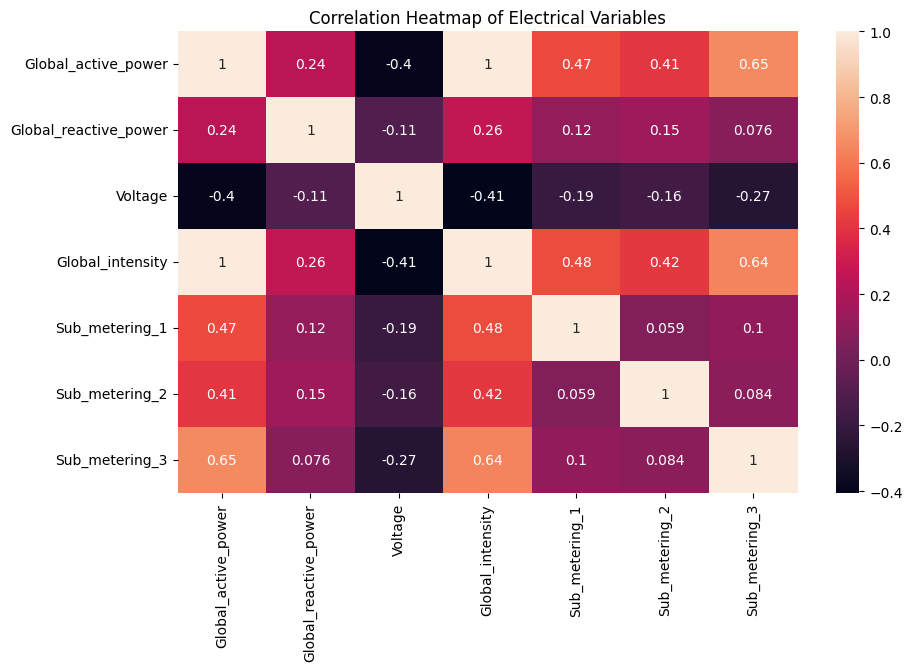

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation Heatmap of Electrical Variables")
plt.show()


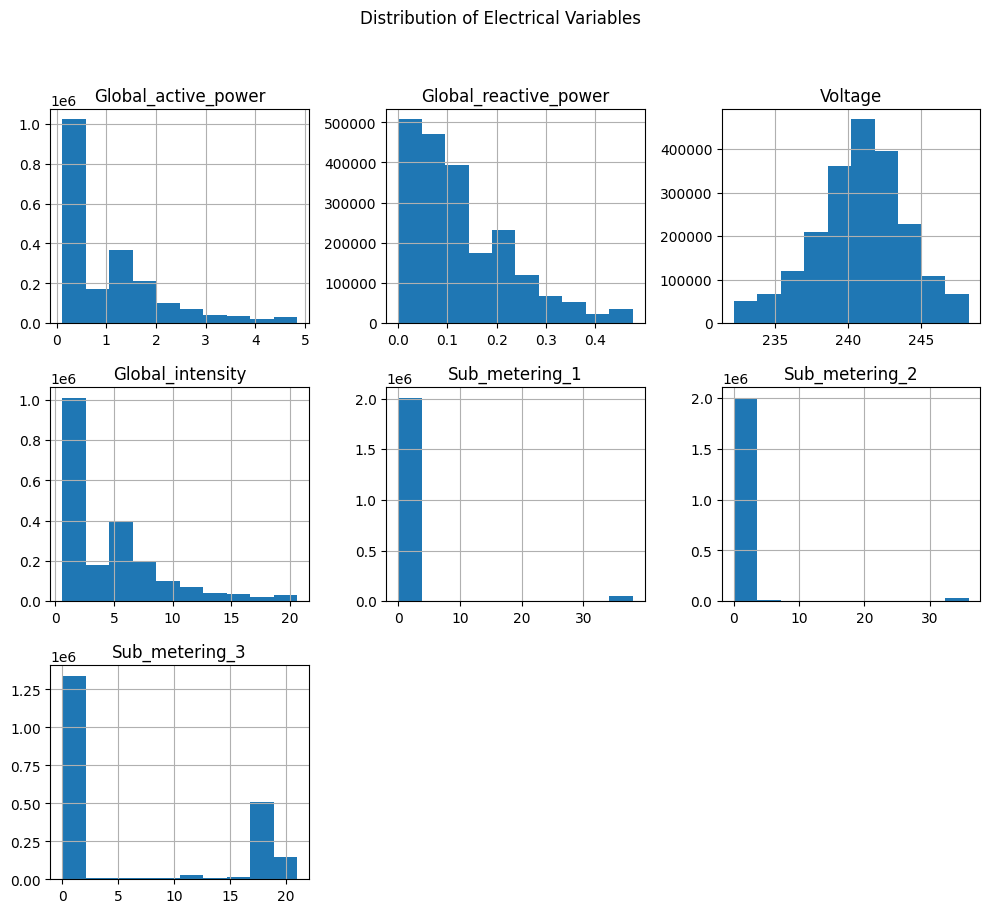

In [ ]:
# Import matplotlib
import matplotlib.pyplot as plt

df.hist(figsize=(12, 10))
plt.suptitle("Distribution of Electrical Variables")
plt.show()


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Global_active_power,2075259.0,1.081775,1.014107,0.112,0.310,0.614000,1.528,4.838
Global_reactive_power,2075259.0,0.122699,0.108550,0.000,0.048,0.100000,0.194,0.476
Voltage,2075259.0,240.837495,3.162012,232.160,238.990,241.000000,242.870,248.260
Global_intensity,2075259.0,4.587214,4.253980,0.600,1.400,2.751585,6.400,20.600
Sub_metering_1,2075259.0,1.084466,5.920257,0.000,0.000,0.000000,0.000,38.000
Sub_metering_2,2075259.0,1.207475,5.049820,0.000,0.000,0.000000,1.000,36.000
Sub_metering_3,2075259.0,6.376512,8.270956,0.000,0.000,1.000000,17.000,21.000


In [ ]:
central_tendency = pd.DataFrame({
    "Mean": df.mean(),
    "Median": df.median(),
    "Std": df.std()
})

central_tendency


,Mean,Median,Std
Global_active_power,1.081775,0.614000,1.014107
Global_reactive_power,0.122699,0.100000,0.108550
Voltage,240.837495,241.000000,3.162012
Global_intensity,4.587214,2.751585,4.253980
Sub_metering_1,1.084466,0.000000,5.920257
Sub_metering_2,1.207475,0.000000,5.049820
Sub_metering_3,6.376512,1.000000,8.270956


Central Tendency Analysis

Global_active_power
Mean (1.08) is substantially higher than the median (0.61), indicating a right-skewed distribution with frequent low consumption and occasional high-usage spikes.

Global_reactive_power
Mean and median are close (0.12 vs 0.10), suggesting a moderately symmetric distribution with limited extreme values.

Voltage
Mean (240.84) and median (241.00) are nearly identical, indicating a stable and symmetric distribution with minimal variability.

Global_intensity
Mean (4.59) is much higher than the median (2.75), confirming right skewness caused by intermittent high current draw periods.

Sub_metering_1 and Sub_metering_2
Both have a median of 0, while means exceed 1, indicating highly sparse usage with occasional bursts of energy consumption.

Sub_metering_3
Shows higher central values (mean 6.38, median 1.0), suggesting more frequent and sustained energy usage compared to other sub-meterings.

In [ ]:
ranges = df.max() - df.min()
ranges


,0
Global_active_power,4.726
Global_reactive_power,0.476
Voltage,16.100
Global_intensity,20.000
Sub_metering_1,38.000
Sub_metering_2,36.000
Sub_metering_3,21.000


Variability and Spread

Voltage has the lowest standard deviation (≈3.16), confirming strong voltage regulation.

Sub_metering_3 exhibits the highest variability (std ≈8.27), reflecting fluctuating demand from appliances such as water heaters and air conditioners.

Global_active_power and Global_intensity show substantial variability, consistent with fluctuating household energy usage patterns.

---

** Applyi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target
X = df.drop(columns=["Global_active_power", "Date", "Time"], errors="ignore")
y = df["Global_active_power"]

# Train-test split (time-aware)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Pipeline: Scaling + Neural Network
nn_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", MLPRegressor(
        hidden_layer_sizes=(32, 16),
        activation="relu",
        solver="adam",
        alpha=0.001,
        early_stopping=True,
        max_iter=300,
        random_state=42
    ))
])

# Train model
nn_pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 MLPRegressor(alpha=0.001, early_stopping=True,
                              hidden_layer_sizes=(32, 16), max_iter=300,
                              random_state=42))])

In [ ]:
# Predictions
y_train_pred = nn_pipeline.predict(X_train)
y_test_pred = nn_pipeline.predict(X_test)

# Metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)


print(f"Training RMSE : {train_rmse:.4f}")
print(f"Test RMSE     : {test_rmse:.4f}")

print(f"Training R²   : {train_r2:.4f}")
print(f"Test R²       : {test_r2:.4f}")


Training RMSE : 0.0327
Test RMSE     : 0.0320
Training R²   : 0.9990
Test R²       : 0.9986


In [ ]:
results = pd.DataFrame({
    "Dataset": ["Training", "Test"],
    "RMSE": [train_rmse, test_rmse],
    "R_squared": [train_r2, test_r2]
})

results


,Dataset,RMSE,R_squared
0,Training,0.032661,0.999029
1,Test,0.031965,0.998619


---

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Global_active_power", "Date", "Time"], errors="ignore")
y = df["Global_active_power"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

def evaluate_model(y_train, y_train_pred, y_test, y_test_pred, model_name):
    return {
        "Model": model_name,
        "Train_RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test_RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train_MAE": mean_absolute_error(y_train, y_train_pred),
        "Test_MAE": mean_absolute_error(y_test, y_test_pred),
        "Train_R2": r2_score(y_train, y_train_pred),
        "Test_R2": r2_score(y_test, y_test_pred),
    }

results = pd.DataFrame([
    evaluate_model(y_train, y_train_pred_lr, y_test, y_test_pred_lr, "Linear Regression"),
    evaluate_model(y_train, y_train_pred_rf, y_test, y_test_pred_rf, "Random Forest")
])

results


,Model,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE,Train_R2,Test_R2
0,Linear Regression,0.040023,0.039285,0.025801,0.024024,0.998542,0.997914
1,Random Forest,0.034215,0.035542,0.019880,0.021949,0.998934,0.998293


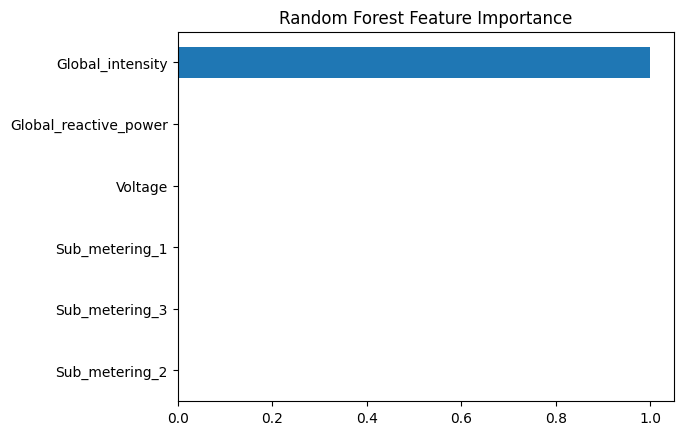

In [ ]:
importances = rf_model.feature_importances_
features = X.columns

pd.Series(importances, index=features).sort_values().plot(
    kind="barh", title="Random Forest Feature Importance"
)
plt.show()


----

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

ridge_params = {
    "alpha": [0.01, 0.1, 1, 10, 100]
}

ridge_cv = GridSearchCV(
    ridge,
    ridge_params,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

ridge_cv.fit(X_train, y_train)

ridge_cv.best_params_, ridge_cv.best_score_


({'alpha': 0.01}, np.float64(0.9984947163587637))

using sample bellow to fing optimum parameter beacause dataset is huge ad applying tht aparaeter to full dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Use only 10% of training data for hyperparameter tuning
X_train_sample, _, y_train_sample, _ = train_test_split(
    X_train,
    y_train,
    train_size=0.1,   # 10% sample
    random_state=42
)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    random_state=42,
    n_jobs=2        # DO NOT use -1 for large data
)

rf_params = {
    "n_estimators": [50, 100],
    "max_depth": [5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf_random = RandomizedSearchCV(
    rf,
    rf_params,
    n_iter=3,       # keep small
    cv=3,
    scoring="r2",
    random_state=42,
    n_jobs=2
)

rf_random.fit(X_train_sample, y_train_sample)

rf_random.best_params_, rf_random.best_score_


({'n_estimators': 100,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_depth': 5},
 np.float64(0.9977059198250057))

In [ ]:
# Correlation with target
corr = df.corr()["Global_active_power"].abs().sort_values(ascending=False)

# Select top 5 predictors (exclude target itself)
selected_features_linear = corr.index[1:6].tolist()

selected_features_linear


['Global_intensity',
 'Sub_metering_3',
 'Sub_metering_1',
 'Sub_metering_2',
 'Voltage']

In [ ]:
import pandas as pd

# Use best RF model (already tuned)
rf_best = rf_random.best_estimator_


feature_importance = pd.Series(importances, index=X.columns)

# Select top 4 features
selected_features_rf = feature_importance.sort_values(ascending=False).head(4).index.tolist()

selected_features_rf


['Global_intensity', 'Global_reactive_power', 'Voltage', 'Sub_metering_1']

In [ ]:
from sklearn.linear_model import Ridge  # or LinearRegression if you prefer plain
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np

# ===========================
# 1. Features
# ===========================
# Linear Regression features (correlation-based)
selected_features_linear = corr.index[1:6].tolist()  # top 5 correlated features

# Random Forest features (importance-based)
selected_features_rf = ['Global_intensity', 'Global_reactive_power', 'Voltage', 'Sub_metering_1']

# ===========================
# 2. Scale Linear Regression features
# ===========================
scaler = StandardScaler()
X_train_linear_scaled = scaler.fit_transform(X_train[selected_features_linear])
X_test_linear_scaled = scaler.transform(X_test[selected_features_linear])

# ===========================
# 3. Train final Linear Regression (Ridge with best alpha)
# ===========================
ridge_final = Ridge(alpha=ridge_cv.best_params_['alpha'])  # alpha from GridSearchCV
ridge_final.fit(X_train_linear_scaled, y_train)
y_test_pred_lr = ridge_final.predict(X_test_linear_scaled)

# ===========================
# 4. Train final Random Forest (tuned)
# ===========================
rf_final = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=2
)
rf_final.fit(X_train[selected_features_rf], y_train)
y_test_pred_rf = rf_final.predict(X_test[selected_features_rf])

# ===========================
# 5. Evaluate final models
# ===========================
def evaluate(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

final_results = pd.DataFrame([
    {"Model": "Ridge Regression (Selected Features)", **evaluate(y_test, y_test_pred_lr)},
    {"Model": "Random Forest (Tuned & Selected Features)", **evaluate(y_test, y_test_pred_rf)}
])

final_results


,Model,MAE,RMSE,R2
0,Ridge Regression (Selected Features),0.028131,0.043906,0.997395
1,Random Forest (Tuned & Selected Features),0.038643,0.054123,0.996041


In [ ]:
# Collect CV scores from previous tuning
# Ridge CV score from GridSearchCV
ridge_cv_score = ridge_cv.best_score_

# Random Forest CV score from RandomizedSearchCV
rf_cv_score = rf_random.best_score_

# Prepare the final comparison table
final_comparison = pd.DataFrame([
    {
        "Model": "Ridge Regression (Selected Features)",
        "Features Used": ", ".join(selected_features_linear),
        "CV Score": round(ridge_cv_score, 4),
        "Test RMSE": round(np.sqrt(mean_squared_error(y_test, y_test_pred_lr)), 4),
        "Test R-squared": round(r2_score(y_test, y_test_pred_lr), 4)
    },
    {
        "Model": "Random Forest (Tuned + Selected Features)",
        "Features Used": ", ".join(selected_features_rf),
        "CV Score": round(rf_cv_score, 4),
        "Test RMSE": round(np.sqrt(mean_squared_error(y_test, y_test_pred_rf)), 4),
        "Test R-squared": round(r2_score(y_test, y_test_pred_rf), 4)
    }
])

final_comparison


,Model,Features Used,CV Score,Test RMSE,Test R-squared
0,Ridge Regression (Selected Features),"Global_intensity, Sub_metering_3, Sub_metering...",0.9985,0.0439,0.9974
1,Random Forest (Tuned + Selected Features),"Global_intensity, Global_reactive_power, Volta...",0.9977,0.0541,0.9960


/tmp/ipython-input-3209402018.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="RMSE", data=comparison, palette="viridis")


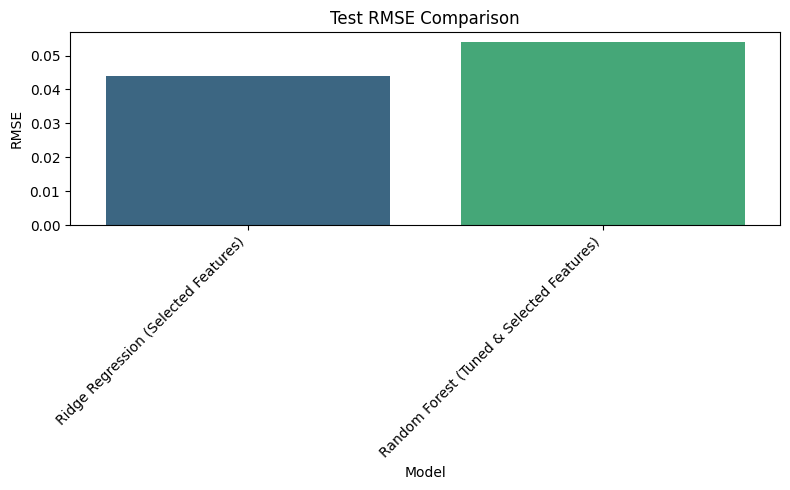

/tmp/ipython-input-3209402018.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="R2", data=comparison, palette="magma")


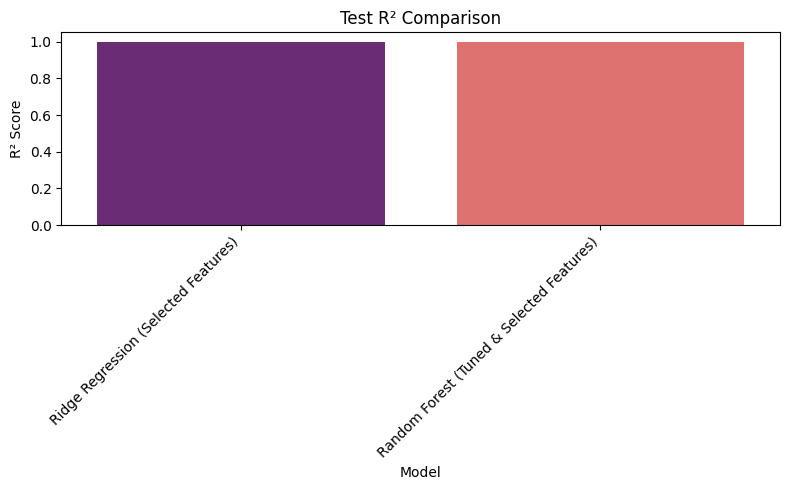

/tmp/ipython-input-3209402018.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=selected_features_rf, palette="coolwarm")


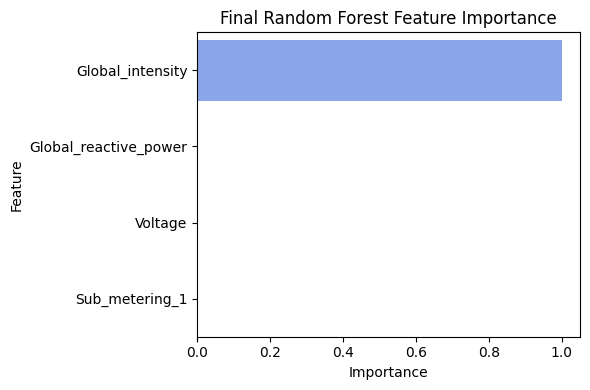

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ===========================
# 1. Prepare comparison table
# ===========================
# Rename columns for plotting
comparison = final_results.copy()
comparison.rename(columns={"Test RMSE": "RMSE", "Test R-squared": "R2"}, inplace=True)

# ===========================
# 2. Plot Test RMSE comparison
# ===========================
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="RMSE", data=comparison, palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.title("Test RMSE Comparison")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.tight_layout()
plt.show()

# ===========================
# 3. Plot Test R² comparison
# ===========================
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="R2", data=comparison, palette="magma")
plt.xticks(rotation=45, ha="right")
plt.title("Test R² Comparison")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

# ===========================
# 4. Plot Random Forest Feature Importance
# ===========================
importances = rf_final.feature_importances_
plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=selected_features_rf, palette="coolwarm")
plt.title("Final Random Forest Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
